# **Diffusion Model for SMLM**

---

<font size = 4>Diffusion model for single molecule localization microscopy (SMLM) is a project aiming to generate high quality, realistic synthetic 2D grayscale images of SMLM data. This work was first published in 2023 by [Saguy *et al.*](https://www.biorxiv.org/content/10.1101/2023.07.06.548004v2.full.pdf).

<font size = 4> The network architecture used here is based on OpenAI's diffusion model, "Improved Diffusion", with minor adjustments and additions:
- [Nichol, A.Q. and Dhariwal, P., 2021, July. Improved denoising diffusion probabilistic models. In International Conference on Machine Learning (pp. 8162-8171). PMLR.](https://proceedings.mlr.press/v139/nichol21a.html)

---

<font size = 4>*Disclaimer*:

<font size = 4>This notebook is inspired from the *Zero-Cost Deep-Learning for Microscopy* project (ZeroCostDL4Mic) (https://github.com/HenriquesLab/DeepLearning_Collab/wiki)

<font size = 4>This notebook is based on the following paper:

- <font size = 4>**This microtubule does not exist: Super-resolution microscopy image generation by a diffusion model**, bioRxiv, 2023-07 by Saguy Alon, Tav Nahimov, Maia Lehrman, Onit Alalouf, and Yoav Shechtman [link to paper](https://www.biorxiv.org/content/10.1101/2023.07.06.548004v2.full.pdf)

  - <font size = 4 >Source code found in: https://github.com/tavnah/improved_diffusion_for_SMLM

  - <font size = 4 >**Dataset availability:** in our paper we used images from [Shareloc](https://shareloc.xyz/#/). More specifically, Alpha-tubulin immuno-labeled with Alexa 647 in U2OS cells acquired by Manish Singh from the Imaging and Modeling Unit at Institut Pasteur, France [Link to images](https://shareloc.xyz/#/r/7234160)



<font size = 4>**Please also cite this original paper when using or developing this notebook.**

# **How to use this notebook?**

---

<font size = 4>Video describing how to use ZeroCostDL4Mic notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook


---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here.

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

#**0. Before getting started**
---

<font size = 4>**Important note**

<font size = 4>- If you wish to **Train a network from scratch** using your own dataset (we encourage everyone to do that), you will need to run **sections 1 - 4**, then use **section 5** to assess the quality of your model and **section 6** to generate images using the model that you trained.

<font size = 4>- If you wish to **Evaluate your model** using a model previously trained and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to assess the quality of your model.

<font size = 4>- If you only wish to **generate images** using a model previously trained and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 6** to run the predictions on the desired model.
---

# **1. Install Diffusion Model for SMLM<font color=white> and dependencies**
---


In [ ]:
#@markdown ##Install Network and dependencies

#Libraries contains information of certain topics.

#Put the imported code and libraries here

Notebook_version = ['1.12'] #Contact the ZeroCostDL4Mic team to find out about the version number
Network = ''

#Create a variable to get and store relative base path
base_path = os.getcwd()

def get_requirements_path():
    # Store requirements file in 'contents' directory
    current_dir = os.getcwd()
    dir_count = current_dir.count('/') - 1
    path = '../' * (dir_count) + 'requirements.txt'
    return path

def filter_files(file_list, filter_list):
    filtered_list = []
    for fname in file_list:
        if b_any(fname.split('==')[0] in s for s in filter_list):
            filtered_list.append(fname)
    return filtered_list

def build_requirements_file(before, after):
    path = get_requirements_path()

    # Exporting requirements.txt for local run
    !pip freeze > $path

    # Get minimum requirements file
    df = pd.read_csv(path)
    mod_list = [m.split('.')[0] for m in after if not m in before]
    req_list_temp = df.values.tolist()
    req_list = [x[0] for x in req_list_temp]

    # Replace with package name and handle cases where import name is different to module name
    mod_name_list = [['sklearn', 'scikit-learn'], ['skimage', 'scikit-image']]
    mod_replace_list = [[x[1] for x in mod_name_list] if s in [x[0] for x in mod_name_list] else s for s in mod_list]
    filtered_list = filter_files(req_list, mod_replace_list)

    file=open(path,'w')
    for item in filtered_list:
        file.writelines(item + '\n')

    file.close()

import sys
before = [str(m) for m in sys.modules]

!pip install fpdf2
!pip install mpi4py
!pip install improved_diffusion_for_SMLM
!pip install nd2reader

from matplotlib import pyplot as plt

import time
import csv
import shutil
import random
import subprocess
import warnings
import cv2
import html

import pandas as pd
import numpy as np

from skimage import io
from fpdf import FPDF, HTMLMixin
from builtins import any as b_any
from datetime import datetime
from ipywidgets import interact, widgets
from pip._internal.operations.freeze import freeze
from tifffile import imread, imsave
from pathlib import PosixPath

import improved_diffusion_for_SMLM.scripts.image_train as image_train
import improved_diffusion_for_SMLM.scripts.image_sample as image_sample
import improved_diffusion_for_SMLM.scripts.patches as patches_utils

class bcolors:
  WARNING = '\033[31m'


warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

def pdf_export(trained = False, augmentation = False, pretrained_model = False):
    # save FPDF() class into a
    # variable pdf
    #from datetime import datetime

    class MyFPDF(FPDF, HTMLMixin):
        pass

    pdf = MyFPDF()
    pdf.add_page()
    pdf.set_right_margin(-1)
    pdf.set_font("Arial", size = 11, style='B')

    Network = "Diffusion Model for SMLM"
    day = datetime.now()
    datetime_str = str(day)[0:10]

    Header = 'Training report for '+Network+' model ('+model_name+')\nDate: '+datetime_str
    pdf.multi_cell(180, 5, txt = Header, align = 'L')

    # add another cell
    if trained:
      training_time = "Training time: "+str(hour)+ "hour(s) "+str(mins)+"min(s) "+str(round(sec))+"sec(s)"
      pdf.cell(190, 5, txt = training_time, ln = 1, align='L')
    pdf.ln(1)

    Header_2 = 'Information for your materials and methods:'
    pdf.cell(190, 5, txt=Header_2, ln=1, align='L')

    all_packages = ''
    for requirement in freeze(local_only=True):
      all_packages = all_packages+requirement+', '
    #print(all_packages)

    #Main Packages
    main_packages = ''
    version_numbers = []
    for name in ['tensorflow','numpy','Keras','csbdeep']:
      find_name=all_packages.find(name)
      main_packages = main_packages+all_packages[find_name:all_packages.find(',',find_name)]+', '
      #Version numbers only here:
      version_numbers.append(all_packages[find_name+len(name)+2:all_packages.find(',',find_name)])

    cuda_version = subprocess.run('nvcc --version',stdout=subprocess.PIPE, shell=True)
    cuda_version = cuda_version.stdout.decode('utf-8')
    cuda_version = cuda_version[cuda_version.find(', V')+3:-1]
    gpu_name = subprocess.run('nvidia-smi',stdout=subprocess.PIPE, shell=True)
    gpu_name = gpu_name.stdout.decode('utf-8')
    gpu_name = gpu_name[gpu_name.find('Tesla'):gpu_name.find('Tesla')+10]
    #print(cuda_version[cuda_version.find(', V')+3:-1])
    #print(gpu_name)

    #shape = io.imread(Training_source+'/'+os.listdir(Training_source)[1]).shape
    dataset_size = len(os.listdir(Training_source))

    text = 'The '+Network+' model was trained from scratch for '+str(number_of_epochs)+' steps, patch size: ('+str(patch_size)+','+str(patch_size)+')) with a batch size of '+str(batch_size)+', using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

    if pretrained_model:
      text = 'The '+Network+' model was trained for '+str(number_of_epochs)+' steps , patch size: ('+str(patch_size)+','+str(patch_size)+')) with a batch size of '+str(batch_size)+', using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). The model was re-trained from a pretrained model. Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

    pdf.set_font('')
    pdf.set_font_size(10.)
    pdf.multi_cell(190, 5, txt = text, align='L')
    pdf.set_font('')
    pdf.set_font('Arial', size = 10, style = 'B')
    pdf.ln(1)
    pdf.cell(28, 5, txt='Augmentation: ', ln=0)
    pdf.set_font('')
    if augmentation:
      aug_text = 'The dataset was augmented by default'
    else:
      aug_text = 'No augmentation was used for training.'
    pdf.multi_cell(190, 5, txt=aug_text, align='L')
    pdf.set_font('Arial', size = 11, style = 'B')
    pdf.ln(1)
    pdf.cell(180, 5, txt = 'Parameters', align='L', ln=1)
    pdf.set_font('')
    pdf.set_font_size(10.)
    if Use_Default_Advanced_Parameters:
      pdf.cell(200, 5, txt='Default Advanced Parameters were enabled')
    pdf.cell(200, 5, txt='The following parameters were used for training:')
    pdf.ln(1)
    html = """
    <table width=40% style="margin-left:0px;">
      <tr>
        <th width = 50% align="left">Parameter</th>
        <th width = 50% align="left">Value</th>
      </tr>
      <tr>
        <td width = 50%>number_of_epochs</td>
        <td width = 50%>{0}</td>
      </tr>
      <tr>
        <td width = 50%>patch_size</td>
        <td width = 50%>{1}</td>
      </tr>
      <tr>
        <td width = 50%>batch_size</td>
        <td width = 50%>{2}</td>
      </tr>
      <tr>
        <td width = 50%>number_of_diffusion_steps</td>
        <td width = 50%>{3}</td>
      </tr>
      <tr>
        <td width = 50%>number_of_channels</td>
        <td width = 50%>{4}</td>
      </tr>
      <tr>
        <td width = 50%>initial_learning_rate</td>
        <td width = 50%>{5}</td>
      </tr>
    </table>
    """.format(number_of_epochs,str(patch_size)+'x'+str(patch_size),batch_size,number_of_diffusion_steps,number_of_channels,initial_learning_rate)
    pdf.write_html(html)

    #pdf.multi_cell(190, 5, txt = text_2, align='L')
    pdf.set_font("Arial", size = 11, style='B')
    pdf.ln(1)
    pdf.cell(190, 5, txt = 'Training Dataset', align='L', ln=1)
    pdf.set_font('')
    pdf.set_font('Arial', size = 10, style = 'B')
    pdf.cell(29, 5, txt= 'Training_source:', align = 'L', ln=0)
    pdf.set_font('')
    pdf.multi_cell(170, 5, txt = Training_source, align = 'L')
    pdf.set_font('')
    # pdf.set_font('Arial', size = 10, style = 'B')
    # pdf.cell(27, 5, txt= 'Training_target:', align = 'L', ln=0)
    # pdf.set_font('')
    #pdf.multi_cell(170, 5, txt = Training_target, align = 'L')
    #pdf.cell(190, 5, txt=aug_text, align='L', ln=1)
    pdf.ln(1)
    pdf.set_font('')
    pdf.set_font('Arial', size = 10, style = 'B')
    pdf.cell(22, 5, txt= 'Model Path:', align = 'L', ln=0)
    pdf.set_font('')
    pdf.multi_cell(170, 5, txt = model_path+'/'+model_name, align = 'L')
    pdf.ln(1)
    pdf.cell(60, 5, txt = 'Example Training', ln=1)
    pdf.ln(1)

    for file in os.listdir(Saving_path):
      if not os.path.isdir(file):
        break
    exp_size = io.imread(os.path.join(Saving_path, file)).shape
    pdf.image(os.path.join(Saving_path, file), x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
    pdf.ln(1)
    ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
    pdf.multi_cell(190, 5, txt = ref_1, align='L')
    ref_2 = '- Diffusion Model for SMLM: Saguy et al. "This microtubule does not exist: Super-resolution microscopy image generation by a diffusion model" BioRxiv, 2023'
    pdf.multi_cell(190, 5, txt = ref_2, align='L')
    if augmentation:
      ref_3 = '- Augmentor: Bloice, Marcus D., Christof Stocker, and Andreas Holzinger. "Augmentor: an image augmentation library for machine learning." arXiv preprint arXiv:1708.04680 (2017).'
      pdf.multi_cell(190, 5, txt = ref_3, align='L')
    pdf.ln(3)
    reminder = 'Important:\nRemember to perform the quality control step on all newly trained models\nPlease consider depositing your training dataset on Zenodo'
    pdf.set_font('Arial', size = 11, style='B')
    pdf.multi_cell(190, 5, txt=reminder, align='C')

    pdf.output(model_path+'/'+model_name+'/'+model_name+"_training_report.pdf")


#Make a pdf summary of the QC results

def qc_pdf_export():
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B')

  Network = "Diffusion Model for SMLM"
  model_name = os.path.basename(full_QC_model_path)
  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Quality Control report for '+Network+' model ('+QC_model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L')

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '

  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(2)
  pdf.cell(190, 5, txt = 'Development of Training Losses', ln=1, align='L')
  pdf.ln(1)
  #exp_size = io.imread(full_QC_model_path+'Quality Control/QC_example_data.png').shape
  if os.path.exists(model_folder.__fspath__()+'/lossCurvePlots.png'):
    pdf.image(model_folder.__fspath__()+'/lossCurvePlots.png', x = 11, y = None)
  else:
    pdf.set_font('')
    pdf.set_font('Arial', size=10)
    pdf.multi_cell(190, 5, txt='If you would like to see the evolution of the loss function during training please play the first cell of the QC section in the notebook.', align='L')
  pdf.ln(2)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(3)
  #pdf.cell(80, 5, txt = 'Example Quality Control Visualisation', ln=1)
  #pdf.ln(1)
  #exp_size = io.imread(full_QC_model_path+'Quality Control/QC_example_data.png').shape
  #pdf.image(full_QC_model_path+'Quality Control/QC_example_data.png', x = 16, y = None, w = round(exp_size[1]/10), h = round(exp_size[0]/10))
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Quality Control Metrics', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)

  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  ref_2 = '- Diffusion Model for SMLM: Saguy et al. "This microtubule does not exist: Super-resolution microscopy image generation by a diffusion model" BioRxiv, 2023'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')

  pdf.ln(3)
  reminder = 'To find the parameters and other information about how this model was trained, go to the training_report.pdf of this model which should be in the folder of the same name.'

  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')

  pdf.output(full_QC_model_path +'/'+QC_model_name+'_QC_report.pdf')

print("Depencies installed and imported.")

# Build requirements file for local run
# -- the developers should leave this below all the other installations
after = [str(m) for m in sys.modules]
build_requirements_file(before, after)

Depencies installed and imported.


# **2. Initialise the Colab session**
---







## **2.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelerator: GPU** *(Graphics processing unit)*

<font size = 4>After running the next cell, make sure you see the following sentence at the top: **"You have gpu access"**


In [ ]:
#@markdown ##Run this cell to check if you have GPU access

import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.')
  print('Did you change your runtime ?')
  print('If the runtime settings are correct then Google did not allocate GPU to your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')

from tensorflow.python.client import device_lib
device_lib.list_local_devices()


You have GPU access


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1063798760265539067
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 493991800580009972
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

## **2.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow'. This will give Colab access to the data on the drive.

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [ ]:
#@markdown ##Run this cell to connect your Google Drive to Colab

#@markdown * Click on the URL.

#@markdown * Sign in your Google Account.

#@markdown * Copy the authorization code.

#@markdown * Enter the authorization code.

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive".

#mounts user's Google Drive to Google Colab.

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **3. Select your paths and parameters**

---

<font size = 4>The code below allows the user to enter the paths to where the training data is and to define the training parameters.

<font size = 4>**Note: Currently, this notebook supports the following formats: .jpg and .tif. Additionally, we do not support stacks of images at the time, so you may only use single image per input file.**

## **3.1. Setting the main training parameters**
---
<font size = 4>

<font size = 5> **Paths for training and results**

<font size = 4>**`Training_source`**: This is the path to the folder containing the training data. This model does not require paired images, so only the source images representing the image data type to generate is needed. To find the path of the folder containing your dataset, go to your Files on the left of the notebook, navigate to the folder containing your files and copy the path by right-clicking on the folder, **Copy path** and pasting it into the right box below.

<font size = 4>**`model_name`**: When naming your model use "_" instead of "-", for example you can name your model My_model and not My-model. Do not use spaces in the name. Avoid using the name of an existing model (saved in the same folder) as it will be overwritten.

<font size = 4>**`model_path`**: Enter the path where your model will be saved once trained (for instance your result folder).

<font size = 5>**Training parameters**

<font size = 4>**`number_of_epochs`**: Specify the number of training epochs (steps) for the network training. Typically, you should use at least 30000 steps. **Default value: 30000**

<font size = 4>**`image_size`**: Specify the generated image size. This is the size in pixels of the image that is genetated by the model. The model is trained to generate images of the same resolution as the training data. This parameter can be memory-limited. **Default value: 64**

<font size = 4>**`number_of_diffusion_steps`**: Specify the number of diffusion iterations the model will perform to generate an image. A higher number of diffusion steps usually leads to better-quality outputs but requires more computation. **Default value: 2000**

<font size = 4>**`save_interval`**: Specify the saving frequency during training. It relates to the number of iterations. **Default value: 2000**

<font size = 5>**Advanced training parameters - experienced users only**

<font size =4>**`batch_size`**: Specify the number of patches used in each training step. Reducing or increasing the **batch size** may slow or speed up your training, respectively, and can influence network performance. **Default value: 10**

<font size =4>**`num_channels`**: Specify the number of channels used in the first convolutional layer of the network. Increasing this value will lead to bigger model, and slower runtime. **Default value: 64**

<font size = 4>**`noise_schedule`**: The noise schedule determines how the model gradually reduces noise or uncertainty in the data during each iteration. Valid values are: 'linear' or 'cosine'. **Default value: cosine**

<font size =4>**`learning_rate`**: Specify the learning rate during training. **Default value: 0.00001**


!! WARNING: Folder already exists and will be overwritten !!


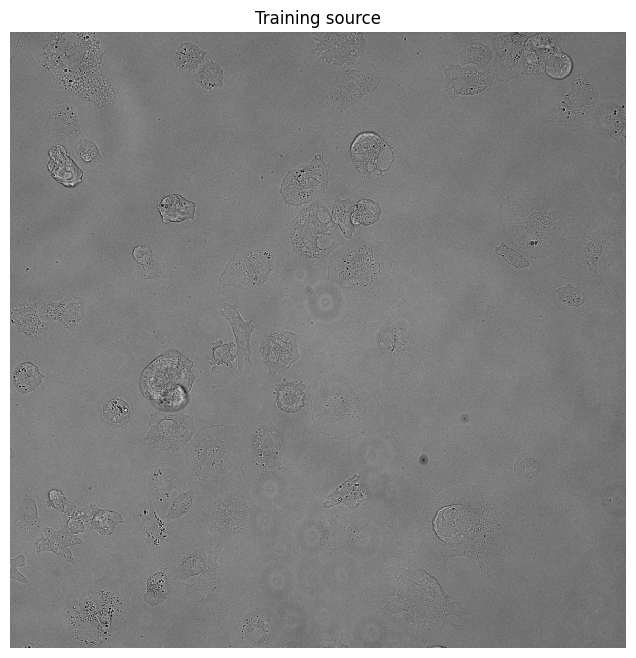

In [ ]:
#@markdown ###Path to training images:

Training_source = "/content/gdrive/MyDrive/HENRIQUES LAB/PROJECTS/ZCDL4M/PIX2PIX-DATA/DAPI-Actin/train/ph" #@param {type:"string"}

# model name and path
#@markdown ###Name of the model and path to model folder:
model_name = "phase-contrast-diffusion-17012024" #@param {type:"string"}
model_path = "/content/gdrive/MyDrive/HENRIQUES LAB/PROJECTS/ZCDL4M" #@param {type:"string"}


# ------------- Initialising folder, variables and failsafes ------------
#  Create the folders where to save the model and the QC
full_model_path = os.path.join(model_path, model_name)
if os.path.exists(full_model_path):
  print(bcolors.WARNING + '!! WARNING: Folder already exists and will be overwritten !!')
else:
  os.makedirs(full_model_path)


# other parameters for training.
#@markdown ###Training Parameters
#@markdown Number of epochs (-1 for infinite):

number_of_epochs =  30000#@param {type:"number"}
#@markdown The wanted image size for generating images.

image_size ="128" #@param ["32","64","128","256"]
image_size=int(image_size)
patch_size = image_size

#@markdown The saving intervel:
save_interval = 2000#@param {type:"number"}


#@markdown ###Advanced Parameters

Use_Default_Advanced_Parameters = True #@param {type:"boolean"}
#@markdown ###If not, please input:

number_of_diffusion_steps = 2000#@param {type:"number"}
batch_size =  10#@param {type:"number"}
num_channels = 64#@param {type:"number"}
noise_schedule='cosine' #@param {type:"string"}
learning_rate=1e-5#@param {type:"number"}

if (Use_Default_Advanced_Parameters):
  print("Default advanced parameters enabled")
  batch_size = 10
  number_of_diffusion_steps = 2000
  num_channels = 64
  noise_schedule='cosine'
  learning_rate=1e-5

# Here we check that patch_size is divisible by 8
if not patch_size % 8 == 0:
    patch_size = ((int(patch_size / 8)-1) * 8)
    print (bcolors.WARNING + " Your chosen patch_size is not divisible by 8; therefore the patch_size chosen is now:",patch_size)

Use_Data_augmentation = False
Use_pretrained_model = False
pretrained_model_path = ""
initial_learning_rate = learning_rate

# This will display a randomly chosen dataset input and output
random_choice = random.choice(os.listdir(Training_source))
x = io.imread(os.path.join(Training_source, random_choice))

f=plt.figure(figsize=(8,8))
plt.imshow(x, cmap='gray', interpolation='nearest')
plt.title('Training source')
plt.axis('off');
plt.savefig(os.path.join(full_model_path, 'TrainingDataExample_pix2pix.png'),bbox_inches='tight',pad_inches=0)


## **3.2. Generate training patches**
---
<font size = 4>To train the network we split each training image to multiple training patches with size equal to the **`image size`** parameter specified above. The number of generated patches is determined by the following parameters.

<font size = 4> **`overlap`**: The parameter should be a value between 0 and 1, representing the extent of overlap between patches. A value of 0 implies no overlap, while 0.5 corresponds to 50% overlap, and so on. **Default value: 0.25**


<font size = 4> **`q1_percentile`**: During our analysis we normalize the patches between [0, 1]. Since fluorescence data may posses high dynamic range, an additional normalization is often required. This parameter specifies which percentile will be saturated to prevent disapprenece of realtively weak fluorescence signal.  **Default value: 0.01**

**In case you have already generated the training patches, you can specify the patches folder as the `Training_source` parameter in the previous section and skip this cell**

In [ ]:


#@markdown Chose parameters for patches generation:

overlap = 0.25 #@param{type:"number"}
q1_percentile = 0.0 #@param{type:"number"}
q3_percentile = 1-q1_percentile


crop_start = (0, 0)
#@markdown **Would you like to save your patches?**

Save_patches = True #@param {type:"boolean"}
Saving_path_patches = "/content/gdrive/MyDrive/HENRIQUES LAB/PROJECTS/ZCDL4M/training_patches" #@param {type:"string"}
os.makedirs(Saving_path_patches, exist_ok=True)

if not Save_patches:
  Saving_path_patches = os.path.join(base_path, "patches")

patch_size = image_size
patches, _= patches_utils.create_patches_for_type(Training_source, (patch_size,patch_size), overlap=overlap, crop_start=crop_start, n_rotations=0)
patches_utils.save_patches(patches, Saving_path_patches, q1_percentile, q3_percentile)

Training_source = Saving_path_patches

## show 4 random patches
if(patches.shape[0] >= 4):
  patches_idx = random.sample(range(patches.shape[0]), 4)

  fig, axes = plt.subplots(1,4, figsize=(12, 3))
  for idx in range(4):
    scaled_image = patches_utils.remove_outliers(np.array(patches[patches_idx[idx],:,:]), q1_percentile, q3_percentile)
    axes[idx].imshow(scaled_image, cmap='gray')
    axes[idx].axis('off')
  plt.suptitle("patches for training")
  plt.show()



## **3.3. Data augmentation**
---
<font size = 4>

<font size = 4>Data augmentation can improve training progress by increasing the dataset size. Smaller datasets may lead to memorization of every example in the dataset (overfitting). Augmentation is not necessary for training and if your training dataset is large you may disable it.

<font size = 4>Data augmentation is performed here by rotating the patches in XY-Plane and flip them along X-Axis. This only works if the images are square in XY.


In [ ]:
#from matplotlib.image import imrea

Use_Data_augmentation = True #@param{type:"boolean"}

#@markdown Select this option if you want to use augmentation to increase the size of your dataset

#@markdown **Rotate each image 3 times by 90 degrees.**
Rotation = False #@param{type:"boolean"}

#@markdown **Flip each image once around the x axis of the stack.**
Flip = True #@param{type:"boolean"}


#@markdown **Would you like to save your augmented images?**

Save_augmented_images = False #@param {type:"boolean"}

Saving_path = "" #@param {type:"string"}


if not Save_augmented_images:
  Saving_path= base_path


def rotation_aug(Source_path, flip=False):
  Source_images = os.listdir(Source_path)

  for image in Source_images:
    source_img = io.imread(os.path.join(Source_path,image))
    # Source Rotation
    if len(source_img.shape)==2:
      axes=(0,1)
    if len(source_img.shape)==3:
      axes=(1,2)
    source_img_90 = np.rot90(source_img,axes=axes)
    source_img_180 = np.rot90(source_img_90,axes=axes)
    source_img_270 = np.rot90(source_img_180,axes=axes)
    # Add a flip to the rotation

    if flip == True:
      source_img_lr = np.fliplr(source_img)
      source_img_90_lr = np.fliplr(source_img_90)
      source_img_180_lr = np.fliplr(source_img_180)
      source_img_270_lr = np.fliplr(source_img_270)


    # Save the augmented files
    # Source images
    io.imsave(Saving_path+'/augmented_patches/'+image,source_img)
    io.imsave(Saving_path+'/augmented_patches/'+os.path.splitext(image)[0]+'_90.tif',source_img_90)
    io.imsave(Saving_path+'/augmented_patches/'+os.path.splitext(image)[0]+'_180.tif',source_img_180)
    io.imsave(Saving_path+'/augmented_patches/'+os.path.splitext(image)[0]+'_270.tif',source_img_270)

    if flip == True:
      io.imsave(Saving_path+'/augmented_patches/'+os.path.splitext(image)[0]+'_lr.tif',source_img_lr)
      io.imsave(Saving_path+'/augmented_patches/'+os.path.splitext(image)[0]+'_90_lr.tif',source_img_90_lr)
      io.imsave(Saving_path+'/augmented_patches/'+os.path.splitext(image)[0]+'_180_lr.tif',source_img_180_lr)
      io.imsave(Saving_path+'/augmented_patches/'+os.path.splitext(image)[0]+'_270_lr.tif',source_img_270_lr)

def flip(Source_path):
  Source_images = os.listdir(Source_path)

  for image in Source_images:
    source_img = io.imread(os.path.join(Source_path,image))

    source_img_lr = np.fliplr(source_img)

    io.imsave(Saving_path+'/augmented_patches/'+image,source_img)
    io.imsave(Saving_path+'/augmented_patches/'+os.path.splitext(image)[0]+'_lr.tif',source_img_lr)




if Use_Data_augmentation:

  if os.path.exists(Saving_path+'/augmented_patches'):
    shutil.rmtree(Saving_path+'/augmented_patches')
  os.mkdir(Saving_path+'/augmented_patches')

  print("Data augmentation enabled")
  print("Data augmentation in progress....")

  if Rotation == True:
    rotation_aug(Training_source,flip=Flip)

  elif Rotation == False and Flip == True:
    flip(Training_source)
  print("Done")


if not Use_Data_augmentation:
  print(bcolors.WARNING+"Data augmentation disabled")

## **3.4. Using weights from a pre-trained model as initial weights**
---
<font size = 4>  Here, you can set the the path to a pre-trained model from which the weights can be extracted and used as a starting point for this training session. **This pre-trained model needs to be a model created using this notebook**.

<font size = 4> This option allows you to perform training over multiple Colab runtimes or to do transfer learning using models trained on different data. **You do not need to run this section if you want to train a network from scratch**.

<font size = 4> In order to continue training from the point where the pre-trained model left off, it is adviseable to also **load the learning rate** that was used when the training ended. This is automatically saved for models trained with ZeroCostDL4Mic and will be loaded here. If no learning rate can be found in the model folder provided, the default learning rate will be used.

<font size = 4> **CUDA out of memory error:** In case you encounter this error, try restarting the runtime and running the notebook again. Notice that your local files will be removed, so don't forget to save trained model if you have one.

In [ ]:
# @markdown ##Loading weights from a pre-trained network

Use_pretrained_model = False #@param {type:"boolean"}

pretrained_model_choice = "Model_from_file" #@param ["Model_from_file"]

#Weights_choice = "last" #@param ["last", "best"]


#@markdown ###If you chose "Model_from_file", please provide the path to the model checkpoint (A file named modelXXXXXX.pt):
pretrained_model_path = "" #@param {type:"string"}
initial_learning_rate = learning_rate
# --------------------- Check if we load a previously trained model ------------------------
if Use_pretrained_model:


# --------------------- Load the model from the choosen path ------------------------
 if pretrained_model_choice == "Model_from_file":
   #h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".h5")
   h5_file_path = pretrained_model_path

# --------------------- Download the a model provided in the XXX ------------------------

  # if pretrained_model_choice == "Model_name":
  #   pretrained_model_name = "Model_name"
  #   pretrained_model_path = "/content/"+pretrained_model_name
  #   print("Downloading the 2D_Demo_Model_from_Stardist_2D_paper")
  #   if os.path.exists(pretrained_model_path):
  #     shutil.rmtree(pretrained_model_path)
  #   os.makedirs(pretrained_model_path)
  #   wget.download("", pretrained_model_path)
  #   wget.download("", pretrained_model_path)
  #   wget.download("", pretrained_model_path)
  #   wget.download("", pretrained_model_path)
  #   h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".h5")

# --------------------- Add additional pre-trained models here ------------------------

# --------------------- Check the model exist ------------------------
# If the model path chosen does not contain a pretrain model then use_pretrained_model is disabled,
 if not os.path.exists(h5_file_path):
  print(bcolors.WARNING+'WARNING: pretrained model does not exist')
  Use_pretrained_model = False


# If the model path contains a pretrain model, we load the training rate,
 if os.path.exists(h5_file_path):
#Here we check if the learning rate can be loaded from the quality control folder
  if os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):

      with open(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv'),'r') as csvfile:
        csvRead = pd.read_csv(csvfile, sep=',')
        #print(csvRead)

        if "learning rate" in csvRead.columns: #Here we check that the learning rate column exist (compatibility with model trained un ZeroCostDL4Mic bellow 1.4)
          print("pretrained network learning rate found")
          #find the last learning rate
          lastLearningRate = csvRead["learning rate"].iloc[-1]
          #Find the learning rate corresponding to the lowest validation loss
          min_val_loss = csvRead[csvRead['val_loss'] == min(csvRead['val_loss'])]
          #print(min_val_loss)
          bestLearningRate = min_val_loss['learning rate'].iloc[-1]

          #if Weights_choice == "last":
          #  print('Last learning rate: '+str(lastLearningRate))

          #if Weights_choice == "best":
          #  print('Learning rate of best validation loss: '+str(bestLearningRate))

        if not "learning rate" in csvRead.columns: #if the column does not exist, then initial learning rate is used instead
          bestLearningRate = initial_learning_rate
          lastLearningRate = initial_learning_rate
          print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(bestLearningRate)+' will be used instead')

#Compatibility with models trained outside ZeroCostDL4Mic but default learning rate will be used
  if not os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):
     print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(initial_learning_rate)+' will be used instead')
     bestLearningRate = initial_learning_rate
     lastLearningRate = initial_learning_rate


# Display info about the pretrained model to be loaded (or not)
if Use_pretrained_model:
  print('Weights found in:')
  print(h5_file_path)
  print('will be loaded prior to training.')

else:
  print(bcolors.WARNING+'No pretrained nerwork will be used.')


# **4. Train the network**
---

## **4.1. Train the network**
---
<font size = 4>When running the cell below you should see training updates every 500 steps (typically, using image size = 256, it takes ~8 minutes to perform 500 training steps). Network training should take several hours.

<font size = 4>**CRITICAL NOTE:** Google Colab has a time limit for processing (to prevent using GPU power for datamining). Training time must be less than 12 hours! If training takes longer than 12 hours, please decrease the number of epochs or number of diffusion steps.

<font size = 4>During the training process, the trained model is automatically saved on your Google Drive, in the **model_path** folder that was selected in Section 3. It is however wise to download the folder as all data can be erased at the next training if specifying the same model folder.

<font size = 4>During training the mean loss and the mean squared error are reported every 500 steps. The reported values with postfix q0, q1, q2, and q3 represents the errors during the first, second, and third quartile of the diffusion steps respectively. Namely, if you use 1000 diffusion steps, the mse_q1 reports the mean squared error during training for diffusion steps number 250-500.

<font size = 4>**Stopping the training before the training ends:** you can stop the training before it reaches the specified number of epochs. The model parameters are saved every 2000 steps by default (you can change it in training parameters). In case you wish to continue the training from the last checkpoint, go back to **section 3.4** and load the last version of your model.

In [ ]:
# @markdown ## Run this cell to train the network

# Export the training parameters as pdf (before training, in case training fails)
#pdf_export(augmentation = Use_Data_augmentation, pretrained_model = Use_pretrained_model)

start = time.time()


# Start Training
if Use_Data_augmentation:
  Data_folder = Saving_path+'/augmented_patches'
else:
  Data_folder=Training_source
#Insert the code necessary to initiate training of your model
image_train.main(model_name =model_name,num_steps=number_of_epochs,logdir=model_path, data_dir=Data_folder, image_size=image_size, num_channels=num_channels, noise_schedule=noise_schedule, diffusion_steps=number_of_diffusion_steps, batch_size=batch_size,lr=learning_rate, resume_checkpoint=pretrained_model_path, save_interval=save_interval)

#trained from scratch or if the pretrained weights are used (3.3.)

# Displaying the time elapsed for training
dt = time.time() - start
mins, sec = divmod(dt, 60)
hour, mins = divmod(mins, 60)
print("Time elapsed:",hour, "hour(s)",mins,"min(s)",round(sec),"sec(s)")

# Export the training parameters as pdf (after training)
pdf_export(trained = True, augmentation = Use_Data_augmentation, pretrained_model = Use_pretrained_model)

Logging to /content/gdrive/MyDrive/HENRIQUES LAB/PROJECTS/ZCDL4M/phase-contrast-diffusion-17012024
creating model and diffusion...
number of model parameters:7175299
channel multiplier: (1, 1, 2, 2, 2)
creating data loader...
data dir: /content/augmented_patches
training...
------------------------
| grad_norm | 2.22     |
| loss      | 1        |
| loss_q0   | 1        |
| loss_q1   | 1        |
| loss_q2   | 1        |
| loss_q3   | 1.01     |
| mse       | 1        |
| mse_q0    | 1        |
| mse_q1    | 1        |
| mse_q2    | 1        |
| mse_q3    | 1.01     |
| samples   | 8        |
| step      | 0        |
------------------------
saving model 0...
saving model 0.9999...
------------------------
| grad_norm | 2.17     |
| loss      | 0.745    |
| loss_q0   | 0.762    |
| loss_q1   | 0.742    |
| loss_q2   | 0.734    |
| loss_q3   | 0.741    |
| mse       | 0.745    |
| mse_q0    | 0.762    |
| mse_q1    | 0.742    |
| mse_q2    | 0.734    |
| mse_q3    | 0.741    |
| samples

# **5. Evaluate your model**
---

<font size = 4>This section allows the user to perform important quality checks on the validity and generalisability of the trained model.

<font size = 4>**We highly recommend to perform quality control on all newly trained models.**



In [ ]:
#@markdown ###Do you want to assess the model you just trained ?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, please provide the name of the model and path to model folder:
#@markdown #####During training, the model files are automatically saved inside a folder named after model_name in section 3. Provide the path to this folder below.

QC_model_folder = "" #@param {type:"string"}
QC_model_name = "" #@param {type:"string"}

# exp_size = io.imread(full_QC_model_path+'Quality Control/QC_example_data.png').shape


if (Use_the_current_trained_model):
  QC_model_folder = model_path
  QC_model_name = model_name

QC_model_path = os.path.join(QC_model_folder, QC_model_name)

model_folder = PosixPath(QC_model_folder)
for file in model_folder.iterdir():
  if file.name.endswith('csv'):
    QC_model_path = file.__fspath__()

if os.path.exists(QC_model_path):
  print("The "+QC_model_name+" network will be evaluated")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')


The phase-contrast-diffusion-17012024 network will be evaluated


## **5.1. Inspection of the loss function**
---

<font size = 4>**Training loss** describes an error value after each epoch for the difference between the model's prediction and its ground-truth target. that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required.


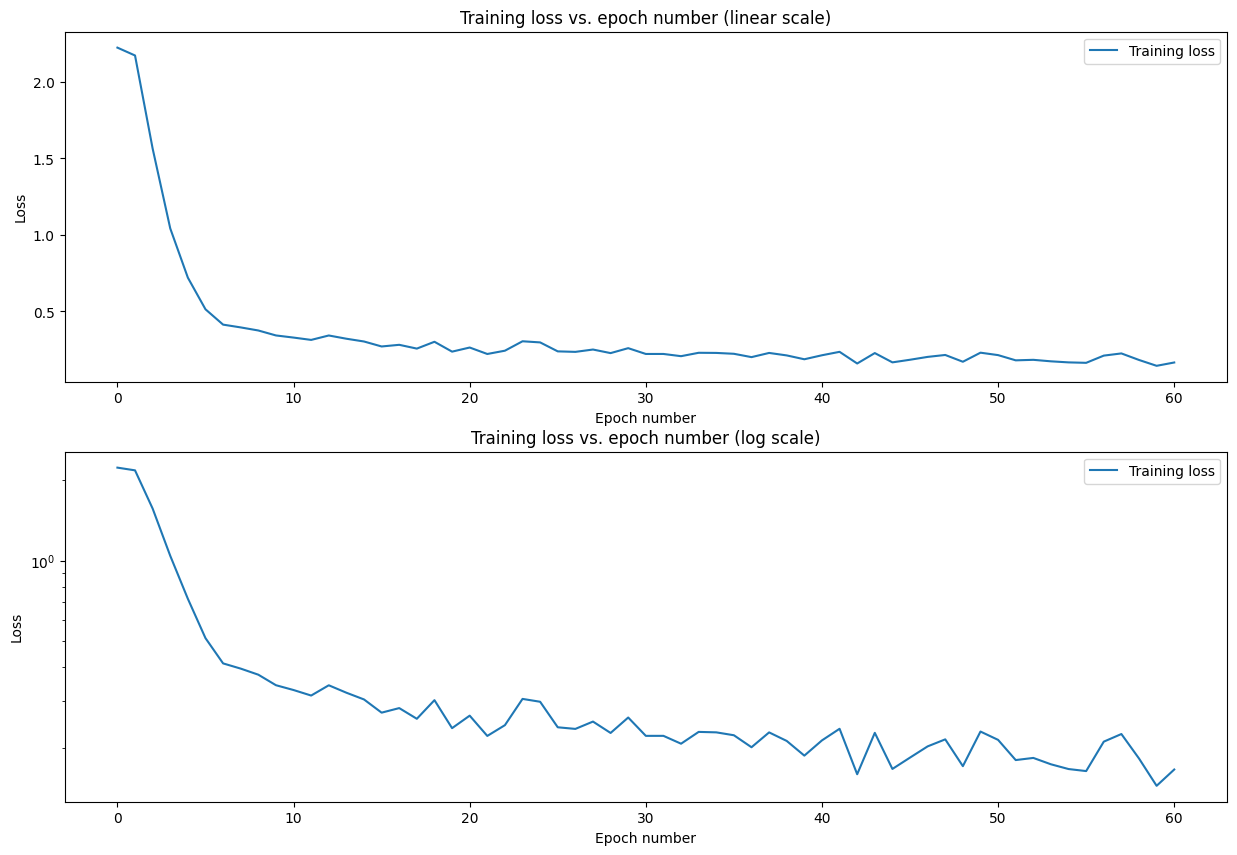

In [ ]:
#@markdown ##Play the cell to show a plot of training errors vs. epoch number

# model_folder = PosixPath(model_path)
# for file in model_folder.iterdir():
#   if file.name.endswith('csv'):
#     QC_model_path = file.__fspath__()

lossDataFromCSV = []
vallossDataFromCSV = []

with open(QC_model_path,'r') as csvfile:
    csvRead = csv.reader(csvfile, delimiter=',')
    next(csvRead)
    for row in csvRead:
        lossDataFromCSV.append(float(row[0]))

epochNumber = range(len(lossDataFromCSV))



plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(epochNumber,lossDataFromCSV, label='Training loss')
plt.title('Training loss vs. epoch number (linear scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()

plt.subplot(2,1,2)
plt.semilogy(epochNumber,lossDataFromCSV, label='Training loss')
plt.title('Training loss vs. epoch number (log scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()
plt.savefig(model_folder.__fspath__()+'/lossCurvePlots.png')
plt.show()

#qc_pdf_export()

# **6. Using the trained model**

---

<font size = 4>In this section, we generate new images using the trained model (in section 4).

## **6.1. Generate images from the model**
---

<font size = 4>The current trained model (from section 4.2) can now be used to generate images. If you want to use an older model, untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Generated output images are saved in your **Result_folder** folder as image stacks (ImageJ-compatible TIFF images).
Note that the generated images are completely virtual and random.

<font size = 4>**`Result_folder`:** This folder will contain the generated output images.

In [ ]:
#@markdown ### Provide the path to the folder where the generated images are saved, then play the cell.

Result_folder = "/content/gdrive/MyDrive/HENRIQUES LAB/PROJECTS/ZCDL4M/results_phase-contrast-diffusion-17012024" #@param {type:"string"}

#@markdown ###How many images do you want to generate?
num_samples = 20#@param {type:"number"}

# model name and path
#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###Which step of the trained model do you want to use?
#@markdown #### If you want to use the last step of the trained model, you can set the value to -1.

step_num_current_model= -1 #@param {type:"number"}

#@markdown ###If not, provide the full path to model folder (it has a name similar to `modelXXXXXX.pt`):
model_full_path = "" #@param {type:"string"}
#@markdown ###Don't forget to make sure that the pretrined model  parameters match the parameters in section 3.1 (for example, image_size and difussion steps)

#Here we find the loaded model name and parent path
#generation_model_name = os.path.basename(Prediction_model_folder)
#generation_model_path = os.path.dirname(Prediction_model_folder)

if (Use_the_current_trained_model):
  print("Using current trained network")
  #generation_model_name = model_name
  #generation_model_path = model_path
  files = os.listdir(os.path.join(model_path, model_name))
  iteration_numbers = [int(file_name[-9:-3]) for file_name in files if file_name.startswith('ema')]


  if step_num_current_model==-1:
    model_step = sorted(iteration_numbers)[-1]
  else:
    if step_num_current_model in iteration_numbers:
      model_step = step_num_current_model
    else:
      W  = '\033[0m'  # white (normal)
      R  = '\033[31m' # red
      print(R+'!! WARNING: The chosen model step does not exist !!'+W)
      print('Please make sure you provide a valid model step before proceeding further.')
  full_generation_model_path = os.path.join(model_path, model_name) + f'/ema_0.9999_{ str(model_step).zfill(6)}.pt'
else:
  full_generation_model_path = model_full_path

  if os.path.exists(full_generation_model_path):
    print("The "+model_full_path+" network will be used.")
  else:
    W  = '\033[0m'  # white (normal)
    R  = '\033[31m' # red
    print(R+'!! WARNING: The chosen model does not exist !!'+W)
    print('Please make sure you provide a valid model path and model name before proceeding further.')

# Generate images
image_sample.main(model_path=full_generation_model_path, output_path=Result_folder, image_size=image_size, num_samples=num_samples)

# Save the generated images as tif files.
main_folder = PosixPath(Result_folder)
for file in main_folder.iterdir():
    if file.name.endswith('npz'):
        with np.load(file.__fspath__()) as data:
            images = data[data.files[0]]
            for i in range(images.shape[0]):
              y = images[i]
              io.imsave(os.path.join(Result_folder, f"generated_image_{i:05d}.tif"), y)

print("Images saved into folder:", Result_folder)

Using current trained network
Logging to /content/gdrive/MyDrive/HENRIQUES LAB/PROJECTS/ZCDL4M/results_phase-contrast-diffusion-17012024
creating model and diffusion...
sampling...
using p_sample
Time taken for one step:  0:01:17.855254
created 10 samples
using p_sample
Time taken for one step:  0:01:15.737391
created 20 samples
saving to /content/gdrive/MyDrive/HENRIQUES LAB/PROJECTS/ZCDL4M/results_phase-contrast-diffusion-17012024/samples_20x128x128x3.npz
sampling complete
Images saved into folder: /content/gdrive/MyDrive/HENRIQUES LAB/PROJECTS/ZCDL4M/results_phase-contrast-diffusion-17012024


## **6.2. Inspect the predicted output**
---



In [ ]:
# @markdown ##Run this cell to display randomly chosen generated images with contrast and brightness control sliders.

main_folder = PosixPath(Result_folder)
for file in main_folder.iterdir():
    if file.name.endswith('npz'):
        with np.load(file.__fspath__()) as data:
            images = data[data.files[0]]

num_of_imgs_to_display = np.min([8, images.shape[0]])
indices = np.random.choice(np.arange(images.shape[0]-1), num_of_imgs_to_display, replace=False)

def update_images(contrast, brightness):
    plt.figure(figsize=(16,8))
    plt.suptitle('Random Generated Samples');
    for image in range(indices.shape[0]):
        y = images[indices[image], :, :, :]
        y = cv2.convertScaleAbs(y, alpha=contrast, beta=brightness)
        plt.subplot(2, indices.shape[0], image + 1)
        plt.axis('off')
        plt.imshow(y, interpolation='nearest', cmap='gray')
    plt.show()

interact(update_images, contrast=widgets.FloatSlider(min=0.1, max=2, step=0.1, value=1, description='Contrast:'),
         brightness=widgets.IntSlider(min=-100, max=100, step=10, value=0, description='Brightness:'))


interactive(children=(FloatSlider(value=1.0, description='Contrast:', max=2.0, min=0.1), IntSlider(value=0, de…

<function __main__.update_images(contrast, brightness)>

## **6.3. Download your generated images**
---

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that the notebook will otherwise **OVERWRITE** all files which have the same name.

# **7. Version log**
---
<font size = 4>**v1.0**:  
*   Compatible for .jpg and .tif formats



#**Thank you for using Diffusion Model for SMLM!**